# The $\chi^2$ distribution

If 

$$
X \sim \mathcal{N}(0,1)
$$
then:

Samples of $X$ are $x_1, x_2, ... , x_K$

And:

$$
Y = \sum_{k=1}^K (x_k)^2 \sim \chi^2_k
$$

Which is a chi-square distribution with $k$ degrees of freedom.


In [1]:
import scipy.stats as st 
import numpy as np 
import matplotlib.pyplot as plt 


50.0


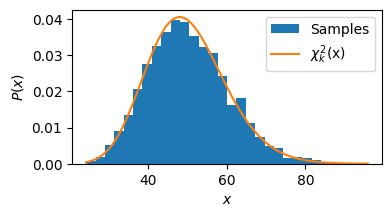

In [3]:
# Where a chi-square appears
n_points = 3000
n_dim = 50 # Degrees of freedom

X = np.random.randn(n_points, n_dim)
Xs = np.sum(X**2, axis=1)
xrange = np.arange(Xs.min(), Xs.max(), 0.1)
chi2 = st.chi2.pdf(xrange, df=n_dim)
print(st.chi2.mean(df=n_dim))

plt.figure(figsize=(4,2))
plt.hist(Xs, density=True, bins=30, label='Samples')
plt.plot(xrange, chi2, label='$\chi^2_k$(x)')
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$P(x)$')
plt.show()

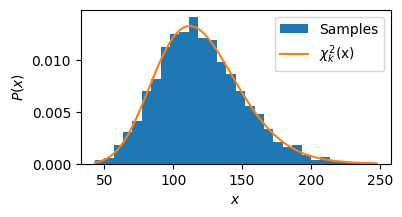

In [4]:
# Scaling the chi-square
n_points = 3000
n_dim = 30 # Degrees of freedom
scale = 2

X = scale*np.random.randn(n_points, n_dim)
Xs = np.sum(X**2, axis=1)
xrange = np.arange(Xs.min(), Xs.max(), 0.1)
chi2 = st.chi2.pdf(xrange, df=n_dim, scale=scale**2)

plt.figure(figsize=(4,2))
plt.hist(Xs, density=True, bins=30, label='Samples')
plt.plot(xrange, chi2, label='$\chi^2_k$(x)')
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$P(x)$')
plt.show()

100.0


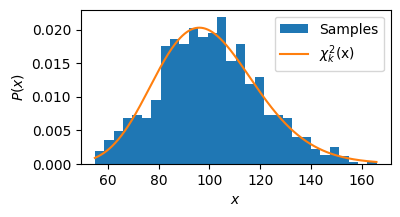

In [5]:
# Distances
# Scaling the chi-square
n_points = 1000
n_dim = 50 # Degrees of freedom

X = np.random.randn(n_points, n_dim)
Y = np.random.randn(n_points, n_dim)
Z = X - Y

Xs = np.sum(Z**2, axis=1)
xrange = np.arange(Xs.min(), Xs.max(), 0.1)
chi2 = st.chi2.pdf(xrange, df=n_dim, scale=2)
print(st.chi2.mean(df=n_dim, scale=2))

plt.figure(figsize=(4,2))
plt.hist(Xs, density=True, bins=30, label='Samples')
plt.plot(xrange, chi2, label='$\chi^2_k$(x)')

plt.legend()
plt.xlabel('$x$')
plt.ylabel('$P(x)$')
plt.show()

## Cosine distance

$$
D(A,B) = 1- \frac{ <A,B>}{||A|| \times ||B||}
$$

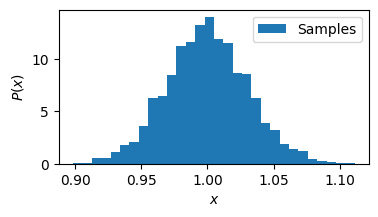

In [53]:
# What happens with cosine distance?
n_points = 3000
n_dim = 1024 # Degrees of freedom

X = np.random.randn(n_points, n_dim)
X = X / ((X**2).sum(axis=1).reshape((-1,1))**0.5)
Y = np.random.randn(n_points, n_dim)
Y = Y / ((Y**2).sum(axis=1).reshape((-1,1))**0.5)
Z = 1-np.sum((X*Y), axis=1)

plt.figure(figsize=(4,2))
plt.hist(Z, density=True, bins=30, label='Samples')
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$P(x)$')
plt.show()

Insights:

* Quando aumentamos a dimensão, temos uma tendência maior de que, em média, as dimensões se cancelem e acabemos encontrando vetores ortogonais



# Proof

$X \sim \mathcal{N}(0,1)$

I have two samples of size $K$ drawn from $X$:

$A = [a_1, a_2, a_3 ... a_K]$

and

$B = [b_1, b_2, b_3 ... b_K]$

$A$ and $B$ are independent, identically distributed.

if $C=AB$, then we have:

$C = [a_1b_1, a_2b_2, ... a_K b_K]$

---
ChatGPT told me this:

To find the mean and variance of the random variable \( Z = XY \), where \( X \) and \( Y \) are independent standard normal random variables, we can use properties of expected values and variances.

First, let's find the mean:

$ \text{E}[Z] = \text{E}[XY] $

Since $ X $ and $ Y $ are independent, we have:

$ \text{E}[Z] = \text{E}[X] \text{E}[Y] = 0 \times 0 = 0 $

So, the mean of $ Z $ is $0 $.

Now, let's find the variance:

$ \text{Var}(Z) = \text{Var}(XY) $

Since $ X$ and $ Y $ are independent, we have:

$ \text{Var}(Z) = \text{E}[(XY)^2] - \text{E}[XY]^2 $

$= \text{E}[X^2Y^2] - (\text{E}[X] \text{E}[Y])^2 $

$ = (\text{E}[X^2] \text{E}[Y^2]) - 0^2$

$ = (\text{Var}(X) + (\text{E}[X])^2)(\text{Var}(Y) + (\text{E}[Y])^2) $

$ = (1 + 0)(1 + 0) = 1 $

So, the variance of $ Z $ is $ 1 $.

Therefore, the mean of $ Z $ is $ 0 $ and its variance is $ 1 $.

---

In [17]:
# Checking this
A = np.random.randn(50000)
B = np.random.randn(50000)
C = A*B
C.mean(), C.std(ddof=1), C.var(ddof=1)

(-0.0034520952172148126, 0.9943716470690863, 0.9887749724948877)

Hence, $\bar{C} \sim \mathcal{N}(0, 1/K)$:

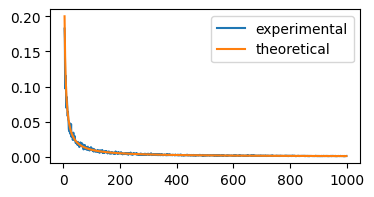

In [23]:
vars = []
Ks = np.array(range(5,1000))
for K in Ks:
    this_vars = []
    for L in range(100):
        A = np.random.randn(K)
        B = np.random.randn(K)
        C = A*B
        this_vars.append(C.mean())
    vars.append(np.var(this_vars, ddof=1))

plt.figure(figsize=(4,2))
plt.plot(Ks, vars, label='experimental')
plt.plot(Ks, 1/Ks, label='theoretical')
plt.legend()
plt.show()

Hence, $||C||^2 \sim \chi^2_K$, thus:

* $E[ ||C||^2 ]=K$
* $Var(||C||^2)=2K$

## Ok, but will this hold when I force norm of A and B to 1?


If $X \sim \mathcal{N}(0,1)$, then $||X||^2 \sim \chi^2_K$.

The expected value for $\chi^2_K$ is $K$.

Demonstration:

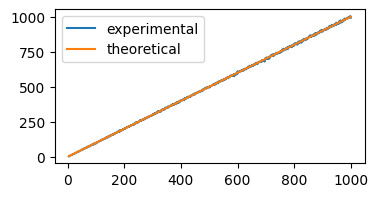

In [21]:
res = []
Ks = np.array(range(5,1000))
for K in Ks:
    this_res = []
    for L in range(100):
        A = np.random.randn(K)
        this_res.append(np.linalg.norm(A)**2)
    res.append(np.mean(this_res))

plt.figure(figsize=(4,2))
plt.plot(Ks, res, label='experimental')
plt.plot(Ks, Ks, label='theoretical')
plt.legend()
plt.show()

## Now lets go on to normalizations

In [150]:
ndim=10000
X = np.random.randn(10, ndim)
normX = np.linalg.norm(X, axis=1).reshape( (-1,1) )
Xnorm = X / normX
C = np.cov(Xnorm)

In [151]:
print(np.round(C*ndim,2))

[[ 1.    0.02 -0.01 -0.    0.   -0.01  0.02  0.01 -0.    0.01]
 [ 0.02  1.   -0.    0.01  0.01  0.01 -0.01 -0.01  0.01  0.  ]
 [-0.01 -0.    1.   -0.   -0.01 -0.01 -0.    0.01 -0.01 -0.01]
 [-0.    0.01 -0.    1.    0.01 -0.01  0.01  0.   -0.01 -0.01]
 [ 0.    0.01 -0.01  0.01  1.    0.    0.01  0.    0.    0.02]
 [-0.01  0.01 -0.01 -0.01  0.    1.   -0.   -0.01  0.    0.  ]
 [ 0.02 -0.01 -0.    0.01  0.01 -0.    1.    0.   -0.01 -0.01]
 [ 0.01 -0.01  0.01  0.    0.   -0.01  0.    1.   -0.    0.01]
 [-0.    0.01 -0.01 -0.01  0.    0.   -0.01 -0.    1.   -0.01]
 [ 0.01  0.   -0.01 -0.01  0.02  0.   -0.01  0.01 -0.01  1.  ]]


$x_i$ when normalized becomes $\frac{x_i}{||x||}=\frac{x_i}{\sqrt{x_1^2 + x_2^2... + x_K^2}}$.

* The variance of $x_i$ is divided by $||x||^2$, whose expected value is $K$ (that is: $V(\frac{x_i}{||x||}) = V(x_i) / K$)
* The covariance between $x_i$ and $x_j$ is initially zero. Because they are only divided, their covariance remains zero.
* The expected value here is still zero!

# HENCE: NORMALIZING DOES NOT HINDER THE INDEPENDENCE, and SAMPLES ARE STILL NORMALLY DISTRIBUTED!

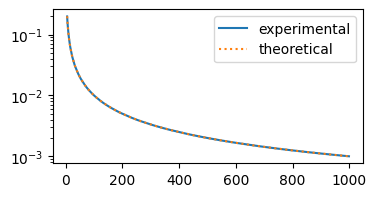

In [171]:
vars = []
Ks = np.array(range(5,1000))
for K in Ks:
    this_vars = []
    for L in range(100):
        A = np.random.randn(K)
        A = A / np.linalg.norm(A)
        this_vars.append(A.var(ddof=1))
    vars.append(np.mean(this_vars))

plt.figure(figsize=(4,2))
plt.plot(Ks, vars, label='experimental')
plt.plot(Ks, 1/Ks, ':', label='theoretical')
plt.legend()
plt.semilogy()
plt.show()

## Now we move back to the CLT:

$X$ and $Y$ are now normalized, hence $V(X)=1/K$ and $V(Y)=1/K$.

* $Z=XY$ has mean $0$.

For $Var(Z)$:

$ = (\text{Var}(X) + (\text{E}[X])^2)(\text{Var}(Y) + (\text{E}[Y])^2) $

$ = (1/K + 0)(1/K + 0) = 1/K^2 $

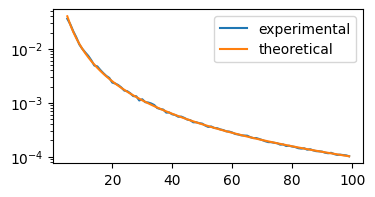

In [158]:
vars = []
Ks = np.array(range(5,100))
for K in Ks:
    this_vars = []
    for L in range(100):
        A = np.random.randn(K)
        A = A / np.linalg.norm(A)
        B = np.random.randn(K)
        B = B / np.linalg.norm(B)
        C = A*B
        this_vars.append(C.var(ddof=1))
    vars.append(np.mean(this_vars))

plt.figure(figsize=(4,2))
plt.plot(Ks, vars, label='experimental')
plt.plot(Ks, 1/(Ks**2), label='theoretical')
plt.legend()
plt.semilogy()
plt.show()

If $C$ has mean $0$ and variance $1/K^2$, then $\sum c_k$ has mean $0$ and variance $1/K$ (sum of K independent variables).

# Ok, so, let's go!

Let:

* $x1 \sim \mathcal{N}(0,I)$,
* $x2 \sim \mathcal{N}(0,I)$,
* $\phi \sim \mathcal{N}(0,I)$,
* $\alpha \in \mathbb{R}$
* $y = x1 + \alpha \phi$

Then:

$\text{Var}(\alpha \phi) = \alpha^2\text{Var}(\phi)$

$\text{Cov}(x1,y) = \text{Var}(x1) + \alpha \text{Var}(x1) + \alpha \text{Cov}(x1, \phi)$

$\text{Var}(y) = \text{Var}(x1) + \alpha^2 \text{Var}(\phi) + 2 \alpha \text{Cov}(x1, \phi)$

In [182]:
x1 = np.random.randn(1000)
phi = np.random.randn(1000)
a = 1
y = x1 + a*phi
print(np.cov(x1, y)[1,0], np.var(x1, ddof=1) + a* np.cov(x1,phi)[1,0])
print(np.var(y, ddof=1), np.var(x1, ddof=1)+ a**2 * np.var(phi, ddof=1) + 2 * a * np.cov(x1,phi)[1,0])

0.9551828221482667 0.9551828221482666
1.873305433036539 1.873305433036539


Let $d1=y-x1$:

$\text{Var}(d1) = \text{Var}(x1) + \text{Var}(x1) + \alpha^2 \text{Var}(\phi) - 2 (\text{Var}(x1) + \alpha \text{Cov}(x1, \phi))$

But we known that $\text{Cov}(x1, \phi)=0$, so we get:

$\text{Var}(d1) = 4 \text{Var}(x1) + \alpha^2 \text{Var}(\phi) = \alpha^2$

(which is quite obvious because $y-x1=\alpha \phi$)

---



Likewise, we can make:

$d2 = y-x2$, leading to:

$\text{Var}(d2) = \text{Var}(y) + \text{Var}(x2) -2 \text{Cov}(x2, y)$

We know that $\text{Cov}(x2, y)=0$, so we get:

$\text{Var}(d2) = \text{Var}(x2) + \text{Var}(x1) + \alpha^2 \text{Var}(\phi)$

$\text{Var}(d2) = 2 + \alpha^2$

In [229]:
K = 100

res = []

for trials in range(100):
    x1 = np.random.randn(K)
    x2 = np.random.randn(K)
    phi = np.random.randn(K)
    alpha = 10
    y = x1 + alpha * phi
    d2 = y-x2
    res.append(d2.var(ddof=1))

print(np.mean(res), np.std(res), 2+alpha**2)

103.22597627637 13.199285531083667 102


Let's see $||d1||^2$ and $||d2||^2$

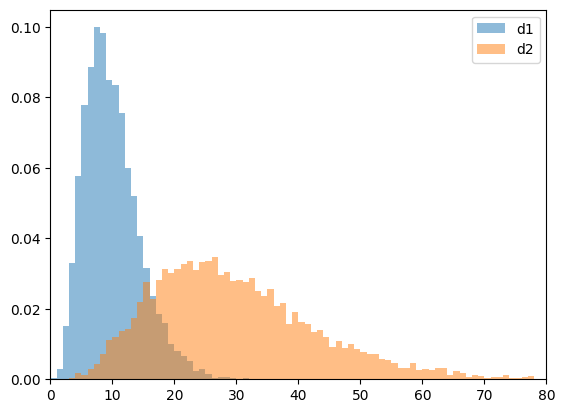

In [31]:
K = 10
normd1sq = []
normd2sq = []

for trials in range(10000):
    x1 = np.random.randn(K)
    x2 = np.random.randn(K)
    phi = np.random.randn(K)
    alpha = 1
    d1 = alpha*phi
    y = x1 + d1
    d2 = y-x2
    normd1sq.append( np.sum(d1**2) )
    normd2sq.append( np.sum(d2**2) )

plt.plot()
plt.hist(normd1sq, alpha=0.5, label='d1', density=True, bins=list(range(100)))
plt.hist(normd2sq, alpha=0.5, label='d2', density=True, bins=list(range(100)))
plt.xlim([0,80])
plt.legend()
plt.show()

But, by definition, if $X \sim \mathcal{N}(0, \sigma^2)$, then $||\frac{X}{\sigma}||^2 \sim  \chi^2_K$.

We know that:

* $\sigma^2_{d1} = Var(d1) = \alpha^2$
* $\sigma^2_{d2} = Var(d2) = 2 + \alpha^2$

So lets define:
* $d1_N = d1 / \alpha$
* $d2_N = d2/ \sqrt{2 + \alpha^2}$

Then:
* $\sum_K (d1_N^2) \sim  \chi^2_K$
* $\sum_K (d2_N^2) \sim  \chi^2_K$


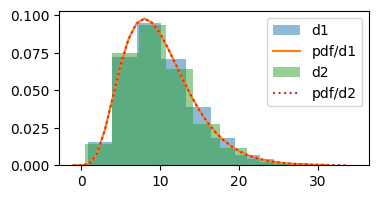

In [124]:
K = 10
normd1sq = []
normd2sq = []

for trials in range(10000):
    x1 = np.random.randn(K)
    x2 = np.random.randn(K)
    phi = np.random.randn(K)
    alpha = 0.5
    d1 = alpha*phi
    d1n = d1/alpha
    y = x1 + d1
    d2 = y-x2
    d2n = d2/np.sqrt(2+alpha**2)
    normd1sq.append( np.sum(d1n**2) )
    normd2sq.append( np.sum(d2n**2) )

plt.figure(figsize=(4,2))
plt.hist(normd1sq, alpha=0.5, label='d1', density=True)
xaxis = list(range(int(min(normd1sq))-1, int(max(normd1sq))+1))
plt.plot(xaxis, st.chi2.pdf(xaxis, df=K), label='pdf/d1')
plt.hist(normd2sq, alpha=0.5, label='d2', density=True)
xaxis = list(range(int(min(normd2sq))-1, int(max(normd2sq))+1))
plt.plot(xaxis, st.chi2.pdf(xaxis, df=K), ':',label='pdf/d2')
plt.legend()
plt.show()


Using a scaled chi-squared:

The scale is equal to $\sigma^2$ if samples were drawn from $N(0, \sigma^2)$

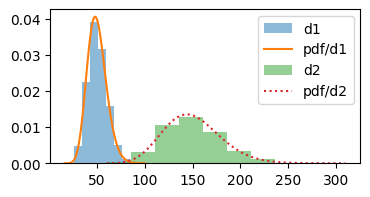

In [129]:
K = 50
normd1sq = []
normd2sq = []

for trials in range(10000):
    x1 = np.random.randn(K)
    x2 = np.random.randn(K)
    phi = np.random.randn(K)
    alpha = 1
    d1 = alpha*phi
    
    y = x1 + d1
    d2 = y-x2

    normd1sq.append( np.sum(d1**2) )
    normd2sq.append( np.sum(d2**2) )

plt.figure(figsize=(4,2))
plt.hist(normd1sq, alpha=0.5, label='d1', density=True)

xaxis = list(range(int(min(normd1sq))-1, int(max(normd1sq))+1))
plt.plot(xaxis, st.chi2.pdf(xaxis, scale=alpha**2, df=K),label='pdf/d1')

plt.hist(normd2sq, alpha=0.5, label='d2', density=True)

xaxis = list(range(int(min(normd2sq))-1, int(max(normd2sq))+1))
plt.plot(xaxis, st.chi2.pdf(xaxis, scale=np.sqrt(2+alpha**2)**2, df=K), ':',label='pdf/d2')
plt.legend()
plt.show()


However, as far as I know, there is no closed-form solution for $d=||d2||^2-||d1||^2$.

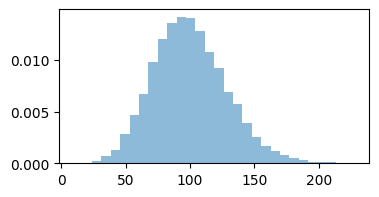

In [218]:
K = 50
normd1sq = []

for trials in range(10000):
    x1 = np.random.randn(K)
    x2 = np.random.randn(K)
    phi = np.random.randn(K)
    alpha = 1
    d1 = alpha*phi

    y = x1 + d1
    d2 = y-x2
    d = np.sum(d2**2)-np.sum(d1**2)
    normd1sq.append(d)

plt.figure(figsize=(4,2))
plt.hist(normd1sq, alpha=0.5, label='d', bins=30, density=True)
plt.show()


# Using a numerical approach:

In [243]:
def alpha_from_snr(snr):
    return 10**(-snr / 20)

n_points = 5

K = 50
normd1sq = []
snrs = list(range(-50, 100, 1))
ps = []
for snr in snrs:
    for trials in range(1000):
        x1 = np.random.randn(K)
        x2 = np.random.randn(K)
        phi = np.random.randn(K)
        alpha = alpha_from_snr(snr)
        d1 = alpha*phi
        y = x1 + d1
        d2 = y-x2
        d = np.sum(d2**2)-np.sum(d1**2)
        normd1sq.append(d)

    trials = np.array(normd1sq)
    P = np.mean(trials<0)
    ps.append(P)



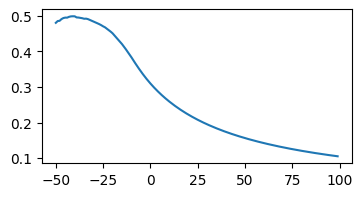

In [244]:
plt.figure(figsize=(4,2))
plt.plot(snrs, ps)

plt.show()